# Solução numérica de EDOs: métodos de Runge-Kutta de segunda ordem

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Comparação de métodos: Euler explícito e modificado

In [2]:
'''
Método de Euler explícito

  Entrada: 
    - ode: eq. diferencial f(x,y) (str)
    - a: ponto inicial do domínio (float)
    - b: ponto final do domínio (float)
    - n: número de pontos discretos (int)
    - w0: condição inicial (float)
    
  Saída:
    - x: variável independente (list)
    - w: variável dependente (list)

    w é o vetor com a solução aproximada
'''
def ode_euler_expl(ode,a,b,n,w0):

    x = n*[0]
    w = n*[0]
    x[0] = a
    w[0] = w0
    
    h = (b-a)/(n-1)

    f = lambda x,y: eval(ode)

    for i in range(n-1):
        x[i+1] = x[i] + h
        s = f(x[i],w[i])        
        w[i+1] = w[i] + h*s

    return x,w

'''
Método de Euler Modificado

  Entrada: 
    - ode: eq. diferencial f(x,y) (str)
    - a: ponto inicial do domínio (float)
    - b: ponto final do domínio (float)
    - n: número de pontos discretos (int)
    - w0: condição inicial (float)
    
  Saída:
    - x: variável independente (list)
    - w: variável dependente (list)

    w é o vetor com a solução aproximada
'''
def ode_euler_mod(ode,a,b,n,w0):

    x = n*[0]
    w = n*[0]
    x[0] = a
    w[0] = w0
    
    h = (b-a)/(n-1)

    f = lambda x,y: eval(ode)

    for i in range(n-1):
        x[i+1] = x[i] + h
        s = f(x[i],w[i])
        wtilde = w[i] + s*h
        sf = f(x[i+1],wtilde)
        w[i+1] = w[i] + 0.5*(s + sf)*h

    return x,w

Abaixo, vamos resolver o PVI: 

\begin{cases}
y' = -1.2y + 7e^(-0.3x) \\
y(0) = 3 \\
0 < x \leq 2 \\
h = 1,0.5,0.25,0.1
\end{cases}


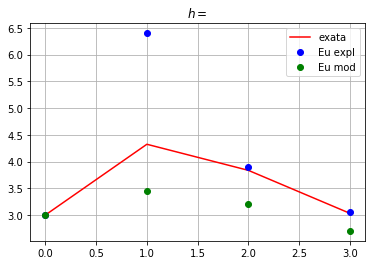

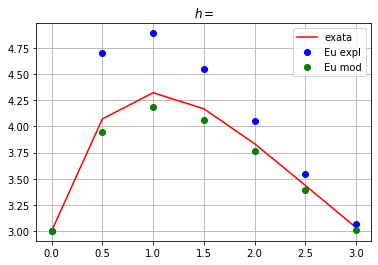

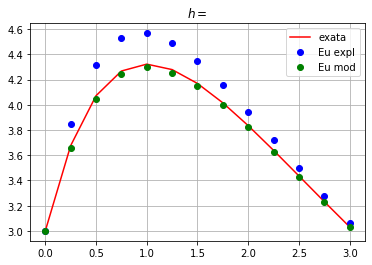

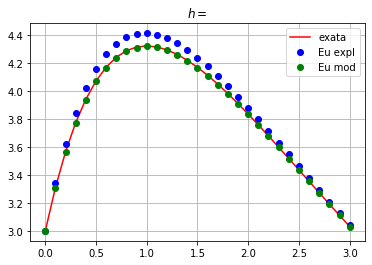

In [3]:
# definição
e = np.exp(1)

# dados de entrada 
a = 0
b = 3.0
ns = [4,7,13,31]
w0 = 3
ode = '-1.2*y + 7*e**(-0.3*x)'

# soluções numéricas

for n in ns:
    # MEE
    x,we = ode_euler_expl(ode,a,b,n,w0)

    # MEM
    x,wm = ode_euler_mod(ode,a,b,n,w0)

    # conversao de dados
    x = np.asarray(x)
    we = np.asarray(we)
    wm = np.asarray(wm)

    # solução exata
    y = 70/9*e**(-0.3*x) - 43/9*e**(-1.2*x)

    # curvas
    plt.figure()
    plt.plot(x,y,'r',label='exata')
    plt.plot(x,we,'bo',label='Eu expl')
    plt.plot(x,wm,'go',label='Eu mod')
    plt.legend()
    tit = '$h = ' + str((b-a)/(n-1)) + '$'
    plt.title('$h=$')
    plt.grid()


In [4]:
def ode_euler_impl(ode,a,b,n,w0):

    x = n*[0]
    w = n*[0]
    x[0] = a
    w[0] = w0
    
    h = (b-a)/(n-1)

    f = lambda x,y: eval(ode)

    for i in range(n-1):
        x[i+1] = x[i] + h
        s = f(x[i],w[i])        
        w[i+1] = w[i] + h*s

    return x,w

In [5]:
ode = '-1.2*y + 7*e**(-0.3*x)'

In [6]:
from IPython.core.display import HTML

def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling();